# DS 2500: Final Project: Spotify Song Popularity Predictor
# Team 49

- Ashritha Akam (akam.a@northeastern.edu)
- Urvi Bhojani (bhojani.u@northeastern.edu)
- Simone Ritcheson (ritcheson.s@northeastern.edu)
- Maximus Saenz (saenz.m@northeastern.edu)

# Executive summary

This project attempts to determine what factors (Beats Per Minute, Energy, Danceability,  Loudness, Liveness, Valence, Length, Acousticness, Speechiness) determine a song's popularity. Using random forest regression and multiple regression [1](#method), we determined that these quantitative music metrics are not features that have significant importance across all genres [2](#result), indicated by the low cross validated r2 score for both machine learning models. Looking at the five most frequently appearing genres in the dataset, we observed differences in the most important metrics per genre [3](#top_five). We discuss the subjectivity of music and how there often is a lot more that determines a song's popularity than the technical qualities of the song itself, including emotional response, marketing, and promotion [4](#discuss) .

# Introduction

Spotify is one of the leading streaming services for music globally, used by millions of people everyday, which provides a very large amount of rich data to be analyzed. We want to see what factors contribute to a song’s popularity on the platform; what factors including (Beats Per Minute, Energy, Danceability,  Loudness, Liveness, Valence, Length, Acousticness, Speechiness) can determine what makes a song popular? Our program will determine the relationship between these factors and predict how certain features can change a song’s ranking


# Data Description
## Data Dictionary

| Music Metric  | Description  |
|---|---|
| Beats Per Minute (BPM)  | The tempo of the song  |
| Energy  |  The energy of a song - the higher the value, the more energetic song |
|  Danceability  |  The higher the value, the easier it is to dance to this song |
|  Loudness  |  The higher the value, the louder the song |
|  Liveness |  The higher the value, the more likely the song is a live recording |
| Valance  | The higher the value, the more positive mood for the song  |
| Length  |  The duration of the song |
|  Acousticness |  The higher the value the more acoustic the song is |
|  Speechiness | The higher the value the more spoken words the song contains  |

## Data Processing Pipeline
- Read in the data from the file (found on Kaggle)
- Clean the data
    - Remove the commas out of columns with numeric values
    - Convert  numeric columns which are strings to integers.

## Read in Data

In [1]:
import pandas as pd
import numpy as np

df_spotify = pd.read_csv('Spotify-2000.csv')
df_spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


## Clean the Data

In [2]:
column_list = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 
               'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 
               'Acousticness', 'Speechiness']

for col in column_list:
    df_spotify[col] = df_spotify[col].replace(',','', regex=True).astype(int)

df_spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


We obtained this Spotify Top Hits (2000-2019) dataset from Kaggle, and it has 18 columns of data. We are focusing on nine of the columns ( the features mentioned previously) to get our results from. This dataset has pretty clean data; the cleaning process entailed extracting the nine columns that we wanted to use and then getting rid of commas and spaces. One issue we came across with the dataset is how the classifications of the data can be subjective. The classifications that Spotify uses on songs, that we used in our analysis, are generated by a computer. For example, Beyonce's Single Ladies received an energy score of 193, while her song Crazy in Love received a 99. There is a 100 point difference in this, and it is hard to quantify what really is 100 points of energy. Another issue is looking at the timeframe of this data, it goes back to Spotify's beginnings in 2000, where it was largely used by the Scandinavian audience it was first introduced to. This means that a lot of the most popular songs are from the earlier days in the software's life, skewing genres like dutch pop towards the top of the most popular genres.

## Visualizations

In [3]:
top_five_genres = ['album rock', 'adult standards', 'dutch pop', 'alternative rock', 'dance pop']

df_spotify_genre = df_spotify.groupby('Top Genre')

df_spotify_album_rock = df_spotify_genre.get_group('album rock')
df_spotify_adult_standards = df_spotify_genre.get_group('adult standards')
df_spotify_dutch_pop = df_spotify_genre.get_group('dutch pop')
df_spotify_alternative_rock = df_spotify_genre.get_group('alternative rock')
df_spotify_dance_pop = df_spotify_genre.get_group('dance pop')

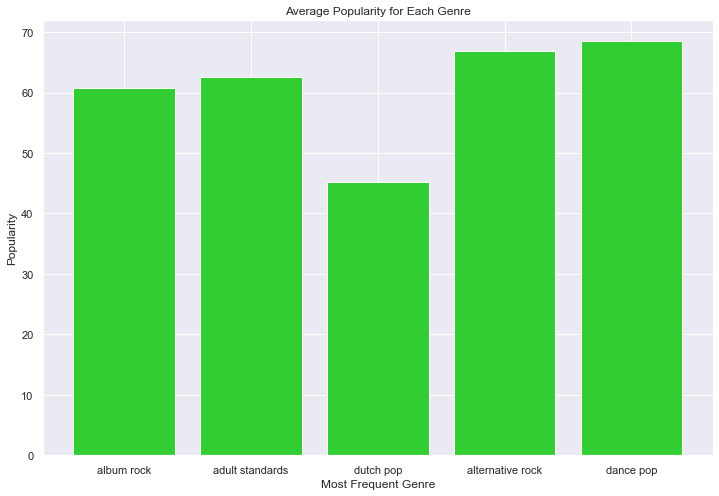

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# average popularity for each genre
# bar graph 
top_five_genres = ['album rock', 'adult standards', 'dutch pop', 'alternative rock', 'dance pop']
df_spotify_genre = df_spotify.groupby('Top Genre')

df_genre_list = [df_spotify_album_rock, df_spotify_adult_standards,
                 df_spotify_dutch_pop, df_spotify_alternative_rock,
                 df_spotify_dance_pop]
# create an empty list 
pop_by_genre = []
for genre in df_genre_list:
    genre_pop = genre["Popularity"].mean()
    pop_by_genre.append(genre_pop)
    
# graph 
plt.bar(top_five_genres, pop_by_genre, color="limegreen")
plt.title("Average Popularity for Each Genre")
plt.xlabel("Most Frequent Genre")
plt.ylabel("Popularity")
sns.set()
plt.gcf().set_size_inches(12,8)

This is a graph for average popularity for the top five genres, with the x axis ordered in most to least frequently appearing genres in our dataset. It shows the genres that have the most frequency are not the most popular. We chose these because it gives us the largest sample size to work with. 

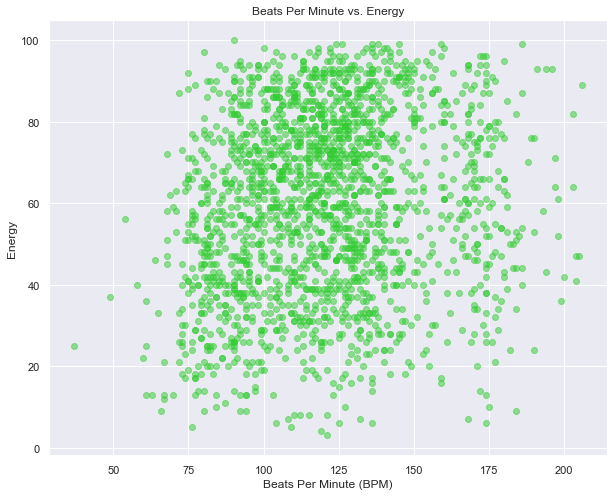

In [5]:
# length versus popularity scatter plot 
# BPM ON X energy on y 


column_list = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 
               'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 
               'Acousticness', 'Speechiness']

for df in column_list:
    # extract data from dataframe
    x = df_spotify.loc[:, 'Beats Per Minute (BPM)'].values
    y = df_spotify.loc[:, 'Energy'].values    
    
plt.scatter(x, y, color="limegreen", alpha=0.5)
plt.title("Beats Per Minute vs. Energy")
plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Energy")
sns.set()
plt.gcf().set_size_inches(10,8)

This graph shows beats per minute versus energy. This graph shows how there is no correlation between BPM and energy, which shows that the spotify categories are determined in different ways. We made this plot to test our intuition - we would normally assume a positive correlation but this shows that the data we used was not as predictable as we thought.  

## Machine Learning Tools and Relevant Assumptions
The machine learning tool that we plan to use is a Decision Tree Random Forest that uses a regression to predict popularity. Given certain features of a song, we can predict if a song will be received well and therefore be popular. We will determine the feature importance of which factors have the most value on popularity and look at the covariance and correlation between different factors to determine which factor has the greatest influence.  We can then use this to predict both new artists and current artist's new total amounts, and since the total number of streams determines ranking, we can predict what the ranking will be. Because the prediction values are continuous, we have chosen to use decision tree random forest that uses a regressor, as opposed to other machine learning methods.

<a id='method'></a>
# Method
Given our goal to predict the popularity of a song based on a set of music metrics and determine which of these music metrics are most important, we have chosen two supervised machine learning methods: Multiple Regression and Random Forest Regression. First viewing the data in a broad sense, we generated a multiple regression equation and feature importance graph for all of the songs in our dataset in order to determine which music metric was most important in determining overall popularity across genres. Then, to narrow our focus, we used the five most frequently appearing genres in our dataset and generated multiple regression equations and feature importance graphs for each, analyzing how the most important features differ across genres and how popularity predictions differ by genre. 

## Multiple Regression
Multiple regression accounts for several dependent variables to predict a single outcome, in this case popularity. Our dataset includes metrics such as beats per minute, energy, danceability, and duration, all of which factor into the overall popularity of the song. As we generate a multiple regression equation for each genre, we assume that the quantitative music metrics are not a direct result of another result, meaning that both variables would essentially imply the same thing and the regression equation would be double counting that factor. However, a potential pitfall comes from the prospect that each of these variables have low influence in determining popularity in the first place and that the metrics given in the dataset are not the best in determining popularity. This case would be indicated through a low cross-validated r2 score for each multiple regression equation explaining what percent of those music metrics determine a change in popularity. 

## Random Forest Regression
Because the magnitude of the regression coefficient does not correspond to the variable’s importance, we have conducted a random forest regression to determine feature importance. The random forest regressor generates multiple decision trees using different training datasets to estimate the majority classification among all of the decision trees. The feature importance is thus computed as the mean decrease in r2  (not cross-validated) across all decision trees. In this case, each node is restricted to use some subset of the music metrics to generate multiple decision trees that determine popularity. By splitting the dataset by the five most frequent genres, we are able to examine the metrics that are most relevant for each genre as well as compare feature importances across genres. However, a low cross-validated r2 score for the random forest regressor, which we have generated to determine how well the random forest regressor works, would also imply that these features are not the most relevant when determining song popularity. 

## Strengths and Weaknesses
By employing two machine learning methods, we are able to compare the accuracy of each machine learning method in determining popularity based on the music metrics. Because multiple regression models have fewer parameters than random forest regression models, there is a greater likelihood of overfitting to occur for random forest regression. Extrapolation is also a useful feature of multiple regression, however for this case as we determine popularity, extrapolation is not as necessary of a function because we would still get a relevant result through a prediction based on the average of the given data, as seen with random forest regression. While both multiple regression and random forest regression have their strengths and weaknesses in terms of predicting popularity based on the given music metrics, the cross-validated r2 for both models will determine which model is better. However, a potential pitfall comes from the prospect that each of these variables have low influence in determining popularity in the first place and that the metrics given in the dataset are not the best in determining popularity.

# Predicting Popularity Across All Genres

## Random Forest Regression

### Cross Validated R2

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import numpy as np

x_feat_list = df_spotify.columns[5:-1]

# extract data from dataframe
x = df_spotify.loc[:, x_feat_list].values
y = df_spotify.loc[:, 'Popularity'].values

rf_reg = RandomForestRegressor(n_estimators=100)

# initialize of kfold object
kfold = KFold()

# initialize an array of same shape and type as y
y_pred = np.empty(y.shape, dtype=y.dtype)

for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]

    rf_reg.fit(x_train, y_train)

    # make predictions given model
    y_pred[test_idx] = rf_reg.predict(x_test)

# get r2 score
r2 = r2_score(y_true=y, y_pred=y_pred)

r2

-0.06701641337734765

### Feature Importance 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

x_feat_list = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 
               'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 
               'Acousticness', 'Speechiness']

# extract data from dataframe
x = df_spotify.loc[:, x_feat_list].values
y = df_spotify.loc[:, 'Popularity'].values

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x, y)

RandomForestRegressor()

In [8]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in R^2 across all Decision Trees)')

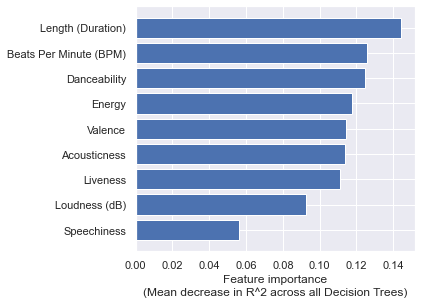

In [9]:
import numpy as np
import seaborn as sns

sns.set()

plot_feat_import(x_feat_list, rf_reg.feature_importances_, limit=10)

## Multiple Regression

### Cross Validated R2

In [10]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

def disp_regress_r2(df, x_feat_list, y_feat):
    """ linear regression, displays model w/ coef
    
    Args:
        df (pd.DataFrame): dataframe
        x_feat_list (list): list of all features in model
        y_feat (list): target feature
        
    Returns:
        reg (LinearRegression): model fit to data
    """
    # initialize regression object
    reg = LinearRegression()

    # get target variable
    # (note: since we index with list -> garauanteed 2d x array, no reshape needed)
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # initialize of kfold object
    kfold = KFold(n_splits=10)

    # initialize an array of same shape and type as y
    y_pred = np.empty(y.shape, dtype=y.dtype)

    for train_idx, test_idx in kfold.split(x, y):
        # split into train and test sets
        x_train = x[train_idx, :]
        y_train = y[train_idx]
        x_test = x[test_idx, :]

        rf_reg.fit(x_train, y_train)

        # make predictions given model
        y_pred[test_idx] = rf_reg.predict(x_test)

    # compute / print r2
    r2 = r2_score(y_true=y, y_pred=y_pred)
    print(f'r2 = {r2:.3} (cross validated)')
    
    return r2

In [11]:
disp_regress_r2(df=df_spotify, x_feat_list=x_feat_list, y_feat='Popularity');

r2 = -0.0473 (cross validated)


### Multiple Regression Equation

In [12]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression

def disp_regress(df, x_feat_list, y_feat, verbose=True):
    """ linear regression, displays model w/ coef
    
    Args:
        df (pd.DataFrame): dataframe
        x_feat_list (list): list of all features in model
        y_feat (list): target feature
        verbose (bool): toggles command line output
        
    Returns:
        reg (LinearRegression): model fit to data
    """
    # initialize regression object
    reg = LinearRegression()

    # get target variable
    # (note: since we index with list -> garauanteed 2d x array, no reshape needed)
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # fit regression
    reg.fit(x, y)

    # compute / store r2
    y_pred = reg.predict(x)
    
    if verbose:
        # print model   
        model_str = y_feat + f' = {reg.intercept_:.2f}'
        for feat, coef in zip(x_feat_list, reg.coef_):
            s_sign = ' - ' if coef < 0 else ' + '
            model_str += s_sign + f'{np.abs(coef):.2f} {feat}'
        print(model_str)

        # compute / print r2
        r2 = r2_score(y_true=y, y_pred=y_pred)
        print(f'r2 = {r2:.3} (not cross validated)')
    
    return reg

In [13]:
disp_regress(df=df_spotify, x_feat_list=x_feat_list, y_feat='Popularity');

Popularity = 67.98 - 0.00 Beats Per Minute (BPM) - 0.07 Energy + 0.09 Danceability + 0.85 Loudness (dB) - 0.10 Liveness + 0.02 Valence - 0.00 Length (Duration) - 0.02 Acousticness + 0.32 Speechiness
r2 = 0.0713 (not cross validated)


# Predicting Popularity for Top 5 Genres

## Extracting Top 5 Genres

In [14]:
genre_list = list(df_spotify['Top Genre'].unique())
df_spotify['Top Genre'].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

<a id='top_five'></a>
## Random Forest Regression - Feature Importance

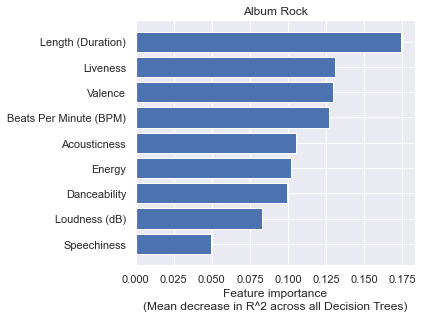

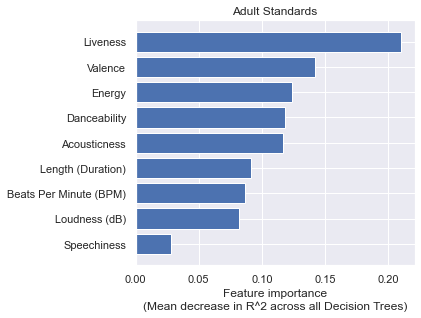

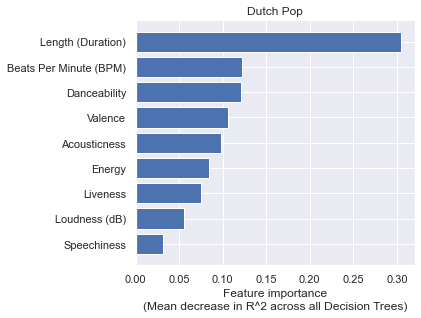

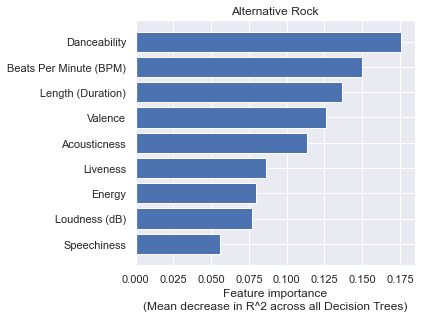

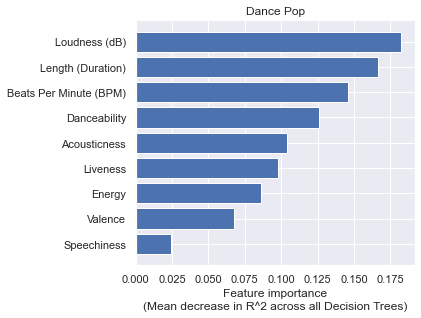

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

x_feat_list = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 
               'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 
               'Acousticness', 'Speechiness']

df_genre_list = [df_spotify_album_rock, df_spotify_adult_standards,
                 df_spotify_dutch_pop, df_spotify_alternative_rock,
                 df_spotify_dance_pop]

genre_list = ['Album Rock', 'Adult Standards', 'Dutch Pop', 'Alternative Rock', 'Dance Pop']

for (df, genre) in zip(df_genre_list, genre_list):
    # extract data from dataframe
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, 'Popularity'].values
    
    rf_reg = RandomForestRegressor(n_estimators=100)

    rf_reg.fit(x, y)
    
    plt.figure()
    
    sns.set()

    plot_feat_import(x_feat_list, rf_reg.feature_importances_, limit=10)
    
    plt.title(genre)

## Multiple Regression Equations

In [16]:
for (df, genre) in zip(df_genre_list, genre_list):
    print('\n'+genre,':')
    disp_regress(df=df, x_feat_list=x_feat_list, y_feat='Popularity');


Album Rock :
Popularity = 69.79 - 0.01 Beats Per Minute (BPM) - 0.02 Energy - 0.04 Danceability + 0.38 Loudness (dB) - 0.11 Liveness + 0.08 Valence - 0.01 Length (Duration) + 0.00 Acousticness + 0.14 Speechiness
r2 = 0.0782 (not cross validated)

Adult Standards :
Popularity = 71.32 + 0.02 Beats Per Minute (BPM) - 0.21 Energy + 0.09 Danceability + 0.61 Loudness (dB) - 0.10 Liveness + 0.07 Valence - 0.01 Length (Duration) - 0.03 Acousticness + 0.45 Speechiness
r2 = 0.126 (not cross validated)

Dutch Pop :
Popularity = 59.86 + 0.03 Beats Per Minute (BPM) - 0.04 Energy + 0.26 Danceability + 0.42 Loudness (dB) - 0.02 Liveness - 0.15 Valence - 0.09 Length (Duration) - 0.00 Acousticness + 0.59 Speechiness
r2 = 0.21 (not cross validated)

Alternative Rock :
Popularity = 63.43 - 0.06 Beats Per Minute (BPM) - 0.10 Energy - 0.02 Danceability + 0.50 Loudness (dB) - 0.10 Liveness + 0.14 Valence + 0.05 Length (Duration) - 0.05 Acousticness + 0.93 Speechiness
r2 = 0.223 (not cross validated)

Dance

<a id='result'></a>
# Results
## Random Forest Regression
Shown above, we fit the whole RandomForestRegressor on our dataset and generated a feature importance graph to show how much the mean square error is reduced by each feature. From this graph alone, we can deduce that the length of each song has the most significance in a song’s popularity, followed by the Beats Per Minute (BPM) and Danceability. With this being said, we can not determine from this plot alone if the Length of a song increases or decreases the song’s popularity (for example, if a shorter song is more favored compared to a longer song).

## Multiple Regression
In an effort to narrow our results further, we performed MultipleRegression on the top five most popular genres of music. We consequently generated five feature importance graphs, one for each genre of music to show how much the mean square error is reduced by each feature. For the most popular genre - Album Rock - we determined that the most significant feature in determining its popularity is Length, followed by Liveness for the genre Adult Standards, Length for Dutch Pop, Danceability for Alternative Rock, and Loudness for Dance Pop. 

<a id='discuss'></a>
# Discussion 
## Interpretation of Reults 
The results that we got show that there are typically not features that we can say are incredibly more important in determining what makes a song popular. Looking at the feature importance across all genres, we see that all of the features are very close, and the R^2 scores are below 0.15. The only feature that was noticeably different was speechiness, which was lower than the other features, implying it is least important in determining whether a song is popular. The most important feature was length, and according to the regression, the longer a song is, the more negatively impacted the popularity is, by a small amount (less than 0.00). 

Looking at each of the top five most frequent genres, which were album rock, adult standards, dutch pop, alternative rock, and dance pop, there are a few features that were more important than others depending on the genre. For adult standards, the most important feature was liveness at an R^2 of ~.20, compared to the next most important feature, valence at ~0.125. The more liveness an adult standards song had, the less popular it was according to the multiple regression. 

A similar difference can be observed in dutch pop, where length was the most important feature with an R^2 of around ~.275, followed by BPM at around ~.125. The multiple regression equation indicates that the longer a song was, the less popular it was. The other three genres, album rock, alternative rock, and dance pop did not have large differences in feature importance as large as the two we discussed.  

## Challenges and Major Takeaways
The results show us that, as we could likely predict, there is no such thing as a formula to make the "perfect song." There are definitely features that we can expect, for example that a song that is incredibly long will not likely be popular because it is less consumable, but there are always exceptions to that rule. Music taste is highly subjective, and song popularity is based on an incredibly wide variety of factors, like becoming popular on platforms like Tik Tok, being used in a TV show, being from a popular artist, or being promoted heavily by a music label - factors which are not represented in our dataset. Oftentimes, popularity is heavily determined by the context surrounding a song's release, and the quality of the song itself is just one piece of this puzzle.

Our lack of a conclusive result in terms of what is most popular in determining a song's popularity is an important takeaway, once again affirming that music is subjective and what may make a song popular is almost up to chance, and there has to be the right storm of conditions. It lets us know that artists should make the songs based on the psychological and emotional response they want to bring out from the audience instead of focusing on a technical formula based on music metrics. They also have to make sure the other parts of making a song popular (like marketing) are equally as valued to get a hit song.

What could be done as a result of this analysis is to do more research on external factors based on emotional and psychological responses about a song's popularity, and take it in tandem with the analysis that we did here. We see that the songs themselves are just one piece of the puzzle, and much more goes into this. Songs like Lil Nas X's Old Town Road became very popular based on the gimmicky nature of it, and the promotion that he did on apps like Tik Tok and Twitter. Yet songs like Shape of You by Ed Sheeran went through a more typical life cycle of a song, being promoted by a record label with live performances, music videos, and traditional radio success. In all of this, it is important to remember and recognize that art is subjective, and from person to person, there will be different levels of enjoyment, and thus different levels of success, and this differs even more in international contexts.

# Works Cited
- https://stackoverflow.com/questions/51037363/linear-regression-vs-random-forest-performance-accuracy
- https://levelup.gitconnected.com/random-forest-regression-209c0f354c84 